#Import Libraries

In [12]:
import os
import re
import shutil
import yaml
import torch
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join 
import random
import matplotlib
import matplotlib.image as mpimg
import imageio

In [2]:
from skimage.io import imread, imshow, imsave
import skimage
from skimage.util import random_noise
from skimage.exposure import adjust_gamma
from scipy import ndimage

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
root_path = '/content/drive/MyDrive/datasets/facemask/'
label_path = '/content/drive/MyDrive/datasets/facemask/labels/train/'
image_path = '/content/drive/MyDrive/datasets/facemask/images/train/'

The link for the dataset https://drive.google.com/drive/folders/1pGxmm5NSWAiyo3egxDyF0jYYOpzKJaJg?usp=sharing

#Creating Subdirectories

The following code is to split the data folder into three subfolders train, test and val. It also moves the data into these three subfolders. Since the folders are already created. No need to run this code again.

**Load data and sort it**

In [ ]:
# images_path="/content/drive/MyDrive/DEBI/CV/FinalProject/datasets/facemask/images"
# labels_path="/content/drive/MyDrive/DEBI/CV/FinalProject/datasets/facemask/labels"
# labels_path = [something for something in os.listdir(labels_path) if not os.path.isdir(labels_path + something)]
# images_files = [something for something in os.listdir(images_path) if not os.path.isdir(images_path + something)]
# labels_path.sort(key = lambda e: int(re.sub('[^0-9]', '', e)))
# images_files.sort(key = lambda e: int(re.sub('[^0-9]', '', e)))

**Split into train-test**

In [ ]:
# from sklearn.model_selection import train_test_split

# show_count = 5 # used <5. Compare images>
# images_train, images_else, labels_train, labels_else = train_test_split(images_files, labels_path, test_size = 0.2,random_state=42)
# images_val, images_test, labels_val, labels_test = train_test_split(images_else, labels_else, test_size = show_count / len(images_else),random_state=42)

# len(images_train), len(images_val), len(images_test)

(400, 95, 5)

**Move the data to 3 folders**

In [ ]:
##Making new directories
# images_path="/content/drive/MyDrive/datasets/facemask/images"
# labels_path="/content/drive/MyDrive/datasets/facemask/labels"

# os.mkdir(images_path+"/train")
# os.mkdir(images_path+"/test") 
# os.mkdir(images_path+"/val") 

# os.mkdir(labels_path+"/train")
# os.mkdir(labels_path+"/test") 
# os.mkdir(labels_path+"/val") 

In [ ]:
##Move test data
# test_image_path= images_path+"/test"
# test_label_path= labels_path+"/test"


# for i in range(len(images_test)):
#   shutil.move(images_path+"/"+images_test[i], test_image_path+"/"+images_test[i])
#   shutil.move(labels_path+"/"+labels_test[i], test_label_path+"/"+labels_test[i])



In [ ]:
##Move val data
# val_image_path= images_path+"/val"
# val_label_path= labels_path+"/val"


# for i in range(len(images_val)):
#   shutil.move(images_path+"/"+images_val[i], val_image_path+"/"+images_val[i])
#   shutil.move(labels_path+"/"+labels_val[i], val_label_path+"/"+labels_val[i])


In [ ]:
# ##Move train data
# train_image_path= images_path+"/train"
# train_label_path= labels_path+"/train"


# for i in range(len(images_train)):
#   shutil.move(images_path+"/"+images_train[i], train_image_path+"/"+images_train[i])
#   shutil.move(labels_path+"/"+labels_train[i], train_label_path+"/"+labels_train[i])

#Data Augmentation

In [ ]:
'''
  Copying the train data and label into new folders to append the augmentated data on them.
'''
#copy all train labels in new folder 
# shutil.copytree(label_path, root_path+'labels/train_augmentation')
# #copy all train images in new folder 
# shutil.copytree(image_path, root_path+'images/train_augmentation')

In [ ]:
'''
  Function takes the image and type of data augmentation 
  Return: the augmented image 
'''
def transformation(image, trans_type):
  if trans_type == 'random noise':
    image_augmented = random_noise(image)
  elif trans_type == 'brightness':
    image_augmented = adjust_gamma(image, gamma=0.5,gain=1)
  elif trans_type == 'dark':
    image_augmented = adjust_gamma(image, gamma=2,gain=1)
  elif trans_type == 'blur':
    image_augmented = ndimage.uniform_filter(image, size=(10, 10, 1))
  
  return image_augmented

In [ ]:
#Function to add the augmented labels
def get_labels(img_name, aug_name):
  des_dir = root_path + 'labels/train_augmentation/'
  src_file = os.path.join(label_path, str(img_name) + '.txt')
  shutil.copy(src_file, des_dir + str(aug_name) + '.txt')

In [ ]:
'''
  The function takes batch of images and type of transformation 
  Save the augmented images into folder train_augmentaion and get the labels 
'''
img_count = 500
def data_augmentation(batch, trans_type):
  global img_count
  for img in batch:
    input_image = os.path.join(image_path, img)
    read_image = imread(input_image)
    augmented = transformation(read_image, trans_type)
    img_name = img.split('.')[0]
    get_labels(img_name, img_count)
    plt.imsave(os.path.join(root_path, 'images/train_augmentation/') + str(img_count) +'.jpg', augmented)

    img_count += 1

In [ ]:
'''
  We don't need to run this cell agin as we already applied the data augmentation and saved them in the folders 
  Apply the data augmentation on the first 200 images by using 4 different types of augmentation on every 50 batches.
'''
# train_images = []
# for img in os.listdir(image_path):
#   train_images.append(img)

# print(len(train_images))

# batch1 = train_images[:50]
# data_augmentation(batch1, 'brightness')
# batch2 = train_images[50:100]
# data_augmentation(batch2, 'random noise')
# batch3 = train_images[100:150]
# data_augmentation(batch3, 'blur')
# batch4 = train_images[150:200]
# data_augmentation(batch4, 'dark')

#Yolo Model

##Withot Data Augmentation

**Create yaml file For yolo**

In [5]:
labels = ['with_mask']
yaml_file = "/content/" + 'config.yaml'

yaml_data = dict(
    path = '/content/drive/MyDrive/datasets/facemask/images',
    train = ('/content/drive/MyDrive/datasets/facemask/images/train'),
    val = ('/content/drive/MyDrive/datasets/facemask/images/val'),
    nc = len(labels),
    names = labels
)

with open(yaml_file, 'w') as f:
    yaml.dump(yaml_data, f, explicit_start = True, default_flow_style = False)

**YOLO Model**

In [6]:
yolo_path = '/content/' + 'yolov5/'
if not os.path.isdir(yolo_path):
    !git clone https://github.com/ultralytics/yolov5.git
!pip3 install -qr {yolo_path}requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 10029, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10029 (delta 1), reused 3 (delta 0), pack-reused 10020
Receiving objects: 100% (10029/10029), 10.34 MiB | 26.28 MiB/s, done.
Resolving deltas: 100% (6953/6953), done.
     |████████████████████████████████| 596 kB 5.1 MB/s 


**Model Parameters**

In [7]:
model_name = 'yolov5l'
image_size = 640
batch_size = 8
epochs = 12
device = '0' if torch.cuda.is_available() else 'cpu'
saved_model_name = 'best.pt'
confidence_threshold = 0.25 
iou_threshold = 0.45 

**Training The Model**

In [ ]:
!python3 {yolo_path}train.py --weights {model_name}.pt \
        --cfg {yolo_path}models/{model_name}.yaml --data {yaml_file} \
        --hyp {yolo_path}data/hyps/hyp.scratch.yaml --epochs {epochs} --batch-size {batch_size} \
        --img-size {image_size} --device {device}

train: weights=yolov5l.pt, cfg=/content/yolov5/models/yolov5l.yaml, data=/content/config.yaml, hyp=/content/yolov5/data/hyps/hyp.scratch.yaml, epochs=12, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-103-g7a39803 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015

**Testing our Model**

In [10]:
model_path = '/content/yolov5/runs/train/exp/weights/best.pt'
test_path='/content/drive/MyDrive/datasets/facemask/images/test'

In [ ]:
!python3 {yolo_path}detect.py --weights {model_path} \
        --source {test_path} --img-size {image_size} \
        --conf-thres {confidence_threshold} --iou-thres {iou_threshold} --device {device} \
        --hide-labels --hide-conf

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/DEBI/CV/FinalProject/datasets/facemask/images/test, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False
YOLOv5 🚀 v6.0-103-g7a39803 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 367 layers, 46108278 parameters, 0 gradients, 107.8 GFLOPs
image 1/5 /content/drive/.shortcut-targets-by-id/1RfDVoeRBBZQClTtpGeMNEH2bkbr3xR5v/FinalProject/datasets/facemask/images/test/172.jpg: 640x512 1 with_mask, Done. (0.128s)
image 2/5 /content/drive/.shortcut-targets-by-id/1RfDVoeRBBZQClTtpGeMNEH2bkbr3xR5v/FinalProject/datasets/facemask/images/test/33.jpg: 640x480 2 with

In [ ]:
predict_images_path = '/content/yolov5/runs/detect/exp'
predict_images = os.listdir(predict_images_path)
predict_images.sort(key = lambda e: int(re.sub('[^0-9]', '', e)))
predict_images

###Drawing Bounding Box

In [ ]:
folder_path = "/content/drive/MyDrive/datasets/facemask/labels/test/"

files = [join(folder_path, f) for f in listdir(folder_path) if isfile(join(folder_path, f)) and f.endswith(".txt")] 
files.sort(key = lambda e: int(re.sub('[^0-9]', '', e)))

In [ ]:
##Getting bounding box points from yolo format
def get_reverse_yolo_format(x_center, y_center, width, height,pic_width,pic_height):
    x_sum= x_center * (2 * pic_width)
    y_sum= y_center * (2 * pic_height)
    x_diff=width *pic_width 
    y_diff=height* pic_height
    x_max=(x_sum+x_diff)/2
    y_max=(y_sum+y_diff)/2
    x_min=x_sum-x_max
    y_min=y_sum-y_max    
    return pic_width, pic_height, x_min, y_min, x_max, y_max

In [ ]:
##Getting Yolo Format from bounding box
def get_yolo_format(pic_width, pic_height, x_min, y_min, x_max, y_max):
    x_center = (x_max + x_min) / (2 * pic_width)
    y_center = (y_max + y_min) / (2 * pic_height)
    width = (x_max - x_min) / pic_width
    height = (y_max - y_min) / pic_height
    return x_center, y_center, width, height

In [ ]:
infos=[]
for file, i in zip(files, range(len(files))):
    image_num=file.split("/")[-1]
    image_num=image_num.split(".")[0]
    file_path="/content/drive/MyDrive/datasets/facemask/images/test/"+image_num+".jpg"
    im=imageio.imread(file_path)
    h, w, _ = im.shape
    temp=[]
    lines = open(file,"r").readlines()
    for line in lines:
      line=line[:-2]
      pic_width, pic_height, x_min, y_min, x_max, y_max = get_reverse_yolo_format(float(line.split(" ")[1]),float(line.split(" ")[2]) , float(line.split(" ")[3]) , float(line.split(" ")[4]),w,h)
      temp.append( [0, x_min, y_min, x_max, y_max])
    info=[w,h]
    for t in temp:
      info.append(t)
    infos.append(info)



In [ ]:
def plot_predicted_vs_true(predict_images,predict_images_path):
  counter=0
  for img_name in predict_images:
    fig=plt.figure(figsize=(10,8))

    ##Plot Predicted Image
    ax=fig.add_subplot(1,2,1)
    ax.set_title("Predicted Box")
    image = mpimg.imread(predict_images_path+ '/' + img_name)
    ax.imshow(image)
    ax.axis(False)

    ##Plot Annotated Image
    ax=fig.add_subplot(1,2,2)
    ax.set_title("Annotated Box")
    image = mpimg.imread(test_path+ '/' + img_name)

    ##Add Box in image
    for box in infos[counter][2:]:
                l, x1, y1, x2, y2 = box
                ax.add_patch(matplotlib.patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth = 1, color = "#FF3838", fill = False))
    ax.imshow(image)
    ax.axis(False)
    counter=counter+1
  plt.show()


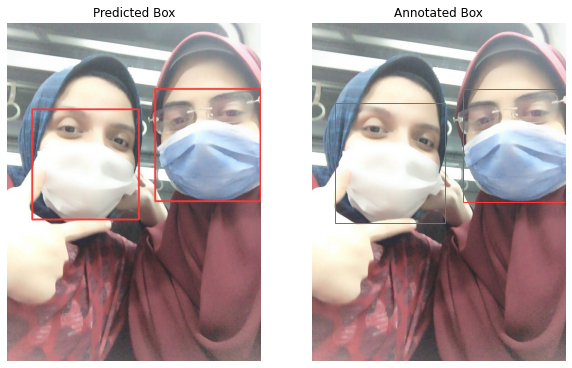

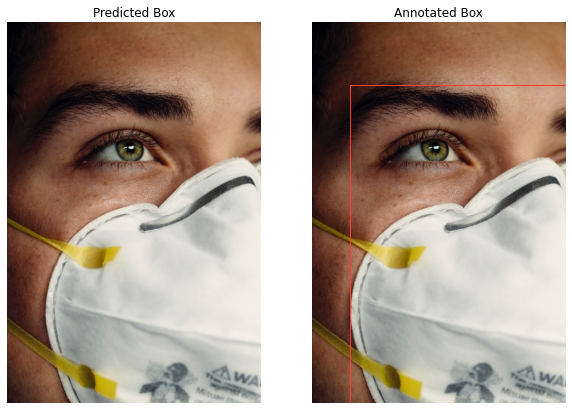

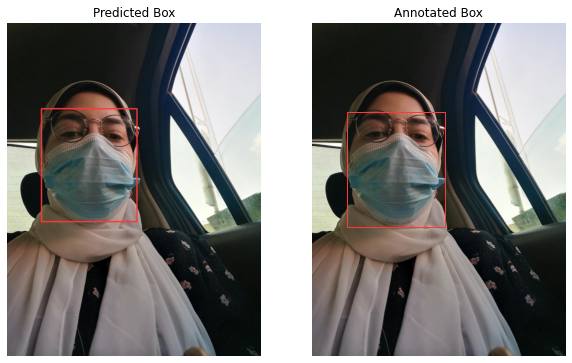

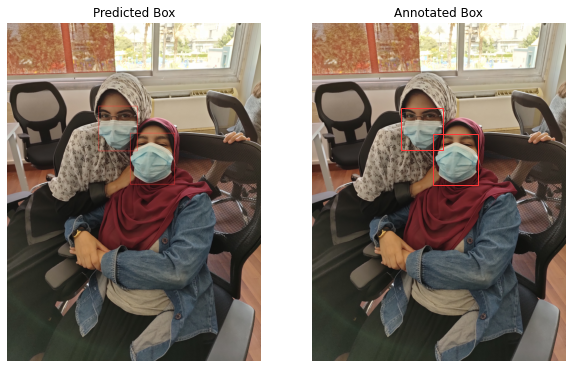

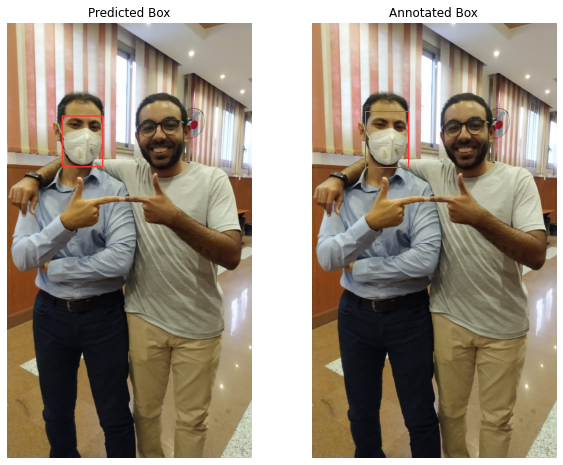

In [ ]:
plot_predicted_vs_true(predict_images,predict_images_path)  

###More Test Samples

In [ ]:
folder_path ='/content/drive/MyDrive/datasets/facemask/images/test'

files = [join(folder_path, f) for f in listdir(folder_path) if isfile(join(folder_path, f)) and f.endswith(".txt")] 
files.sort(key = lambda e: int(re.sub('[^0-9]', '', e)))

In [ ]:
new_test_path='/content/drive/MyDrive/datasets/facemask/images/test'
model_path = '/content/best.pt'

In [ ]:
!python3 {yolo_path}detect.py --weights {model_path} \
        --source {new_test_path} --img-size {image_size} \
        --conf-thres {confidence_threshold} --iou-thres {iou_threshold} --device {device} \
        --hide-labels --hide-conf

detect: weights=['/content/best.pt'], source=/content/new_test, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False
YOLOv5 🚀 v6.0-106-g4c7b2bd torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 367 layers, 46108278 parameters, 0 gradients, 107.8 GFLOPs
image 1/5 /content/new_test/1.jpeg: 416x640 1 with_mask, Done. (1.363s)
image 2/5 /content/new_test/2.jpeg: 640x480 Done. (1.568s)
image 3/5 /content/new_test/3.jpeg: 640x480 1 with_mask, Done. (1.539s)
image 4/5 /content/new_test/4.jpg: 480x640 1 with_mask, Done. (1.519s)
image 5/5 /content/new_test/5.jpg: 384x640 Done. (1.224s)
Speed: 1.8ms pre-process, 1442.6ms inference, 3.2ms NMS per image at shape (1, 3, 640, 640)
Resu

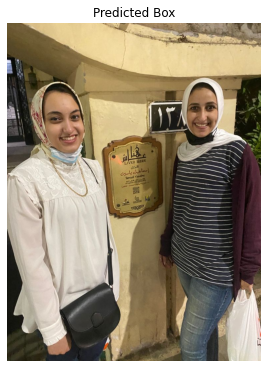

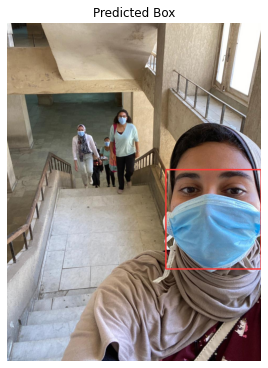

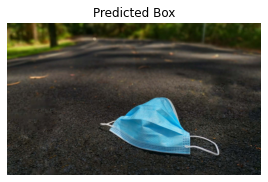

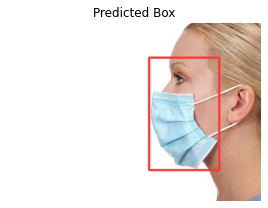

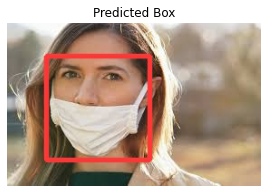

In [ ]:
counter=0
new_test_img=os.listdir("/content/yolov5/runs/detect/exp4")
for img_name in new_test_img:
    fig=plt.figure(figsize=(10,8))
    ##Plot Predicted Image
    ax=fig.add_subplot(1,2,1)
    ax.set_title("Predicted Box")
    image = mpimg.imread("/content/yolov5/runs/detect/exp4/"+img_name)
    ax.imshow(image)
    ax.axis(False)

##With Data Augmentation

In [ ]:
labels = ['with_mask']
yaml_file = "/content/" + 'config.yaml'

yaml_data = dict(
    path = '/content/drive/MyDrive/datasets/facemask/images',
    train = ('/content/drive/MyDrive/datasets/facemask/images/train_augmentation'),
    val = ('/content/drive/MyDrive/datasets/facemask/images/val'),
    nc = len(labels),
    names = labels
)

with open(yaml_file, 'w') as f:
    yaml.dump(yaml_data, f, explicit_start = True, default_flow_style = False)

In [ ]:
yolo_path = '/content/' + 'yolov5/'
if not os.path.isdir(yolo_path):
    !git clone https://github.com/ultralytics/yolov5.git
!pip3 install -qr {yolo_path}requirements.txt

In [ ]:
model_name = 'yolov5l'
image_size = 640
batch_size = 8
epochs = 12
device = '0' if torch.cuda.is_available() else 'cpu'
saved_model_name = 'best.pt'
confidence_threshold = 0.25 
iou_threshold = 0.45 

**Training The Model**

In [ ]:
!python3 {yolo_path}train.py --weights {model_name}.pt \
        --cfg {yolo_path}models/{model_name}.yaml --data {yaml_file} \
        --hyp {yolo_path}data/hyps/hyp.scratch.yaml --epochs {epochs} --batch-size {batch_size} \
        --img-size {image_size} --device {device}

train: weights=yolov5l.pt, cfg=/content/yolov5/models/yolov5l.yaml, data=/content/config.yaml, hyp=/content/yolov5/data/hyps/hyp.scratch.yaml, epochs=12, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-108-g53349da torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015

**Testing our Model**

In [ ]:
model_path = '/content/yolov5/runs/train/exp2/weights/best.pt'

In [ ]:
test_path='/content/drive/MyDrive/datasets/facemask/images/test'

In [ ]:
!python3 {yolo_path}detect.py --weights {model_path} \
        --source {test_path} --img-size {image_size} \
        --conf-thres {confidence_threshold} --iou-thres {iou_threshold} --device {device} \
        --hide-labels --hide-conf

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/ComputerVision/datasets/facemask/images/test, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False
YOLOv5 🚀 v6.0-108-g53349da torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 367 layers, 46108278 parameters, 0 gradients, 107.8 GFLOPs
image 1/5 /content/drive/.shortcut-targets-by-id/1pGxmm5NSWAiyo3egxDyF0jYYOpzKJaJg/datasets/facemask/images/test/172.jpg: 640x512 1 with_mask, Done. (0.128s)
image 2/5 /content/drive/.shortcut-targets-by-id/1pGxmm5NSWAiyo3egxDyF0jYYOpzKJaJg/datasets/facemask/images/test/33.jpg: 640x480 2 with_masks, Done. (0.112s)
image 3/

In [ ]:
predict_images_path = '/content/yolov5/runs/detect/exp'
predict_images = os.listdir(predict_images_path)
predict_images.sort(key = lambda e: int(re.sub('[^0-9]', '', e)))
predict_images

['33.jpg', '77.jpg', '172.jpg', '352.jpg', '410.jpg']

####Drawing Bounding Box

In [ ]:
infos=[]
for file, i in zip(files, range(len(files))):
    image_num=file.split("/")[-1]
    image_num=image_num.split(".")[0]
    file_path="/content/drive/MyDrive/datasets/facemask/images/test/"+image_num+".jpg"
    im=imageio.imread(file_path)
    h, w, _ = im.shape
    temp=[]
    lines = open(file,"r").readlines()
    for line in lines:
      line=line[:-2]
      pic_width, pic_height, x_min, y_min, x_max, y_max = get_reverse_yolo_format(float(line.split(" ")[1]),float(line.split(" ")[2]) , float(line.split(" ")[3]) , float(line.split(" ")[4]),w,h)
      temp.append( [0, x_min, y_min, x_max, y_max])
    info=[w,h]
    for t in temp:
      info.append(t)
    infos.append(info)



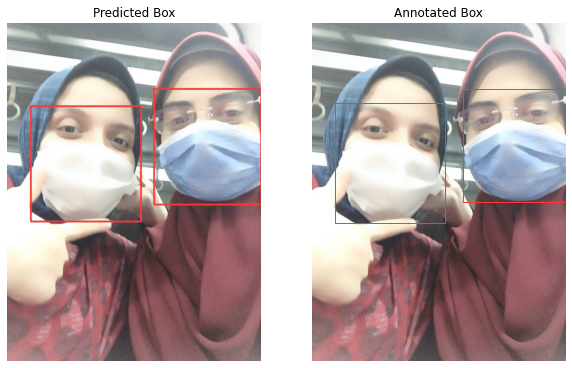

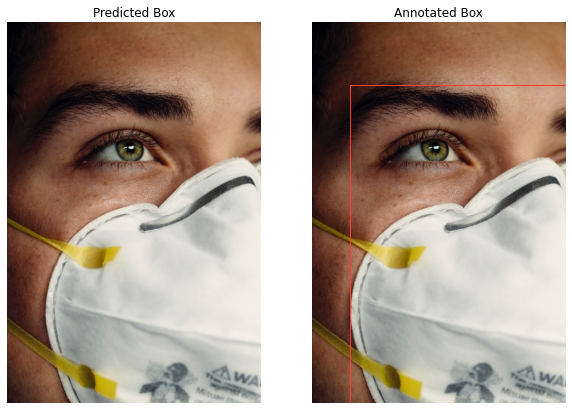

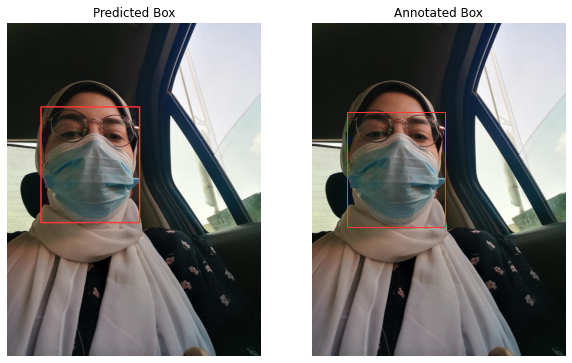

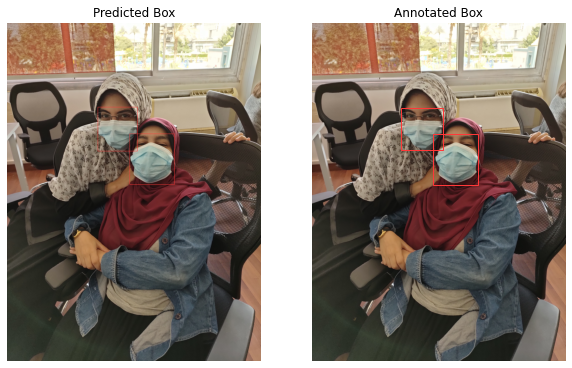

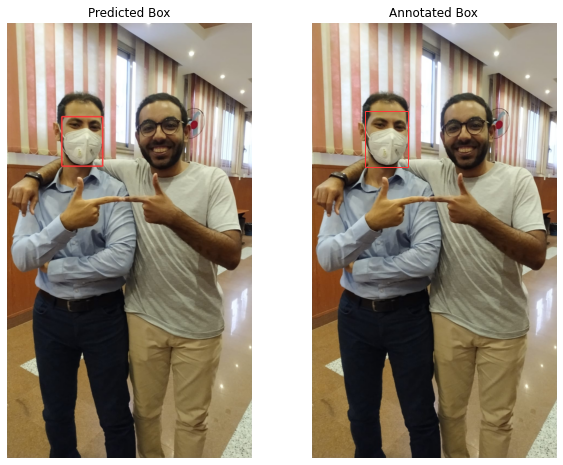

In [ ]:
plot_predicted_vs_true(predict_images,predict_images_path)  

###New Test

In [ ]:
!python3 {yolo_path}detect.py --weights {model_path} \
        --source {new_test_path} --img-size {image_size} \
        --conf-thres {confidence_threshold} --iou-thres {iou_threshold} --device {device} \
        --hide-labels --hide-conf

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/ComputerVision/datasets/facemask/images/new_test/, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False
YOLOv5 🚀 v6.0-108-g53349da torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 367 layers, 46108278 parameters, 0 gradients, 107.8 GFLOPs
image 1/5 /content/drive/.shortcut-targets-by-id/1pGxmm5NSWAiyo3egxDyF0jYYOpzKJaJg/datasets/facemask/images/new_test/1.jpeg: 416x640 1 with_mask, Done. (0.114s)
image 2/5 /content/drive/.shortcut-targets-by-id/1pGxmm5NSWAiyo3egxDyF0jYYOpzKJaJg/datasets/facemask/images/new_test/2.jpeg: 640x480 Done. (0.124s)
image 3/5 

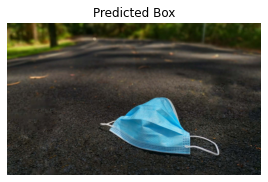

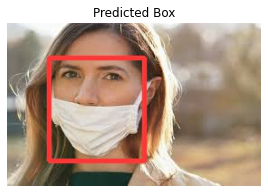

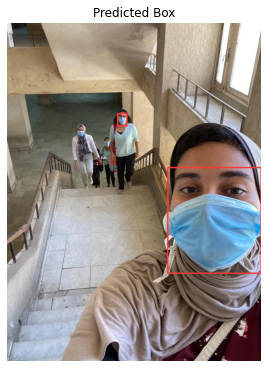

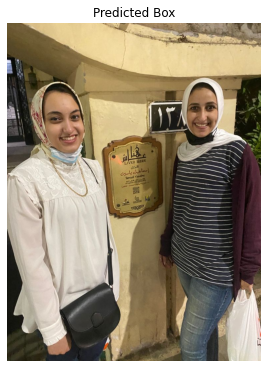

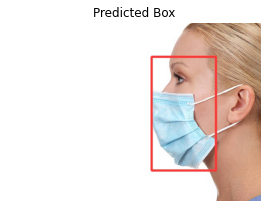

In [ ]:
counter=0
new_test_img=os.listdir("/content/yolov5/runs/detect/exp2")
for img_name in new_test_img:
    fig=plt.figure(figsize=(10,8))
    ##Plot Predicted Image
    ax=fig.add_subplot(1,2,1)
    ax.set_title("Predicted Box")
    image = mpimg.imread("/content/yolov5/runs/detect/exp2/"+img_name)
    ax.imshow(image)
    ax.axis(False)